# Importing libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2




%matplotlib inline

# Loading Dataset

In [3]:
loan=pd.read_excel("Dataset/Bank_Personal_Loan_Modelling.xlsx")
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## About the Data

##### The features:
- ID: Customer ID.
- Age: Customer's age in completed years.
- Experience: #years of professional experience.
- Income: Annual income of the customer.
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer.
- CCAvg: Avg. spending on credit cards per month.
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
- Mortgage: Value of house mortgage if any. 
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by UniversalBank?


##### The label:
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?

#### some information about dataset

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
loan.describe(include="all")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
loan.drop(["ID","ZIP Code"],inplace=True,axis=1)

# Data Analysis

<Axes: xlabel='Personal Loan', ylabel='count'>

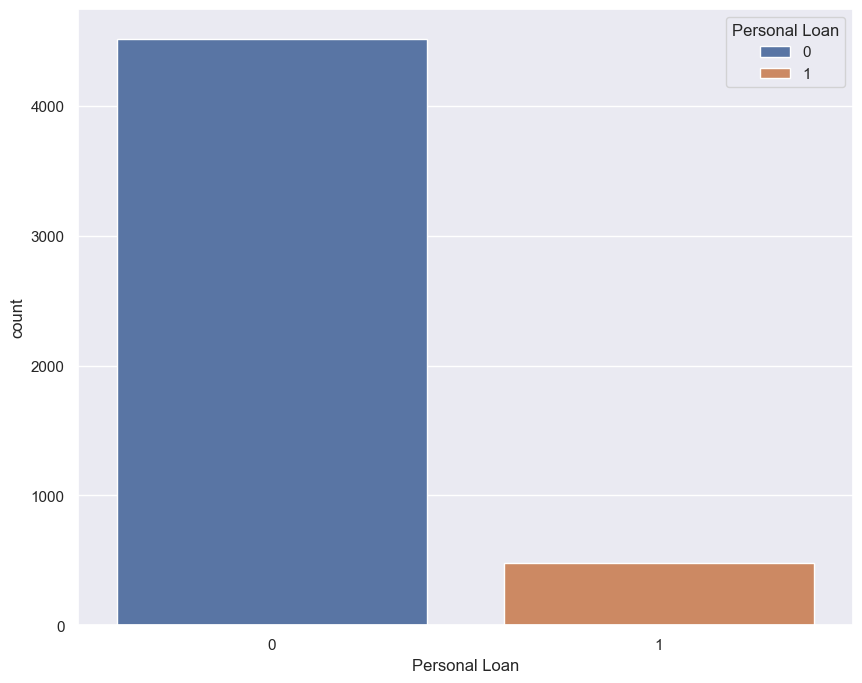

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(data=loan,x="Personal Loan",hue="Personal Loan")

- here as we see alot of persons didn`t accept the loan so we need to deal with it using startify

## Vesualizing The Catigorical data

In [8]:
need_to_convert_category=["Personal Loan","Education","Securities Account","CD Account","Online","CreditCard","Family"]
for category in need_to_convert_category:
    loan[category]=loan[category].astype("object")

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   object 
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   object 
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   object 
 8   Securities Account  5000 non-null   object 
 9   CD Account          5000 non-null   object 
 10  Online              5000 non-null   object 
 11  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [10]:
category_features=loan.select_dtypes(include=["object"]).columns
category_features=category_features.delete(2)

In [11]:
loan["Education"]=loan["Education"].map({1:"Undergrade",2:"Graduate",3:"Advanced/Professional"})
loan["Personal Loan"]=loan["Personal Loan"].map({1:"Yes",0:"No"})
loan["Securities Account"]=loan["Securities Account"].map({1:"Yes",0:"No"})
loan["CD Account"]=loan["CD Account"].map({1:"Yes",0:"No"})
loan["Online"]=loan["Online"].map({1:"Yes",0:"No"})
loan["CreditCard"]=loan["CreditCard"].map({1:"Yes",0:"No"})

In [12]:
loan["Family"].unique()
category_features

Index(['Family', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [13]:
from itertools import cycle

colors=cycle(["black","green","blue","yellow","pink","gray"])

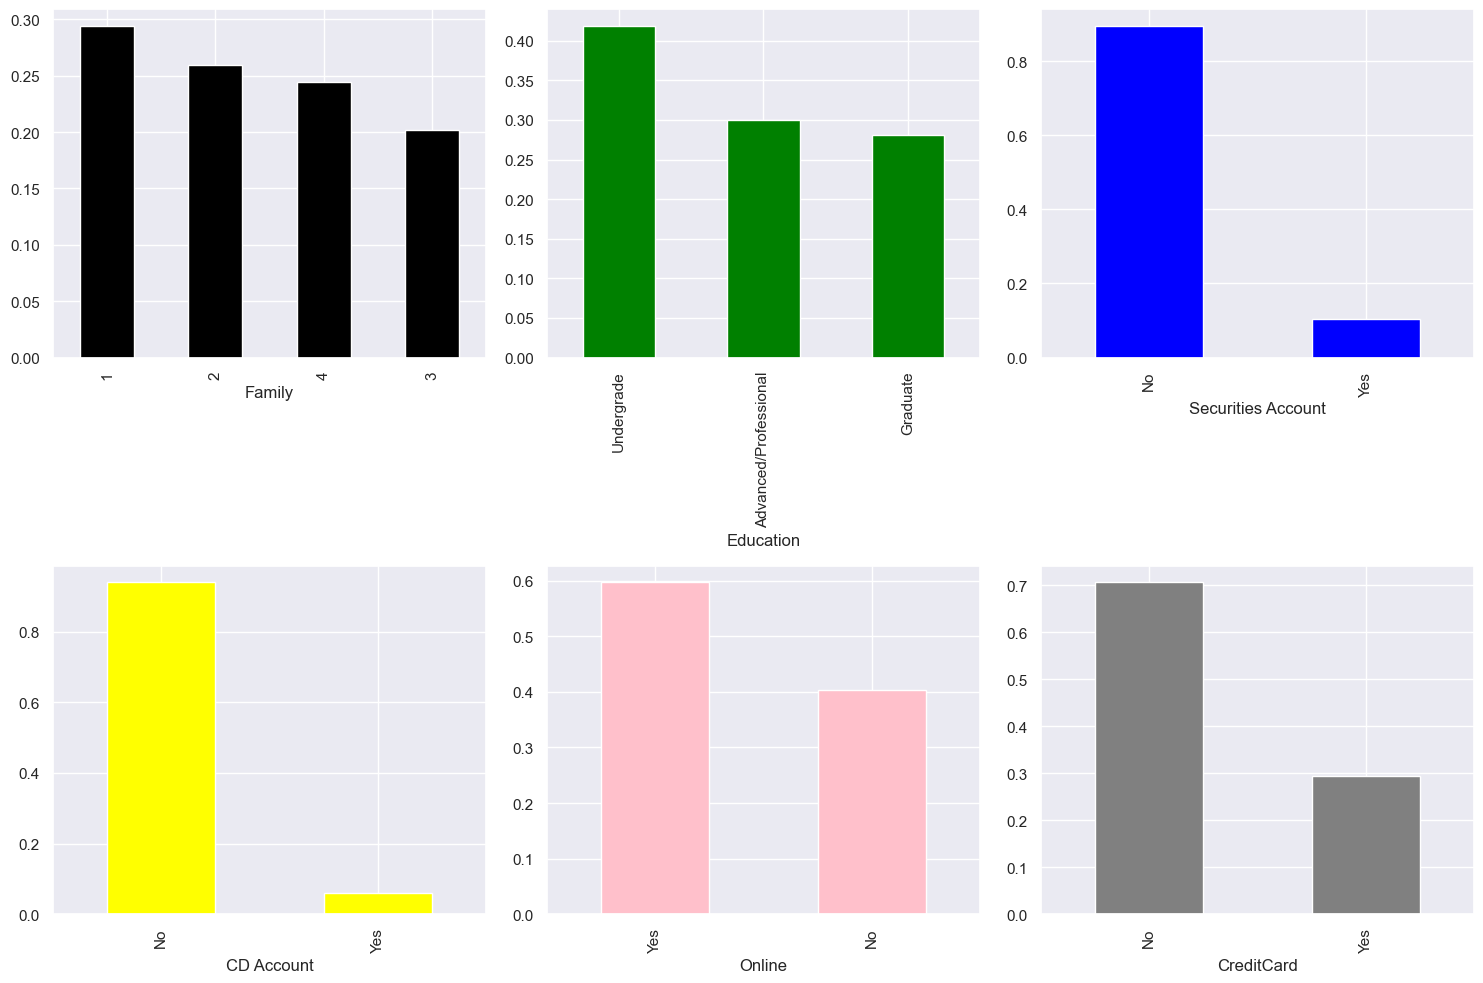

In [14]:
for idx,feature in enumerate(category_features):
    plt.subplot(2,3,idx+1)
    loan[feature].value_counts(normalize=True).plot.bar(figsize=(15,10),color=next(colors))
plt.tight_layout()
plt.show()

##### as we can see:
- undergrade person is the most example
- preson with no securities Account has most examples
- preson with no CD Account Account has most examples
- person who online banking is most example
- person who use credit card is the most examples

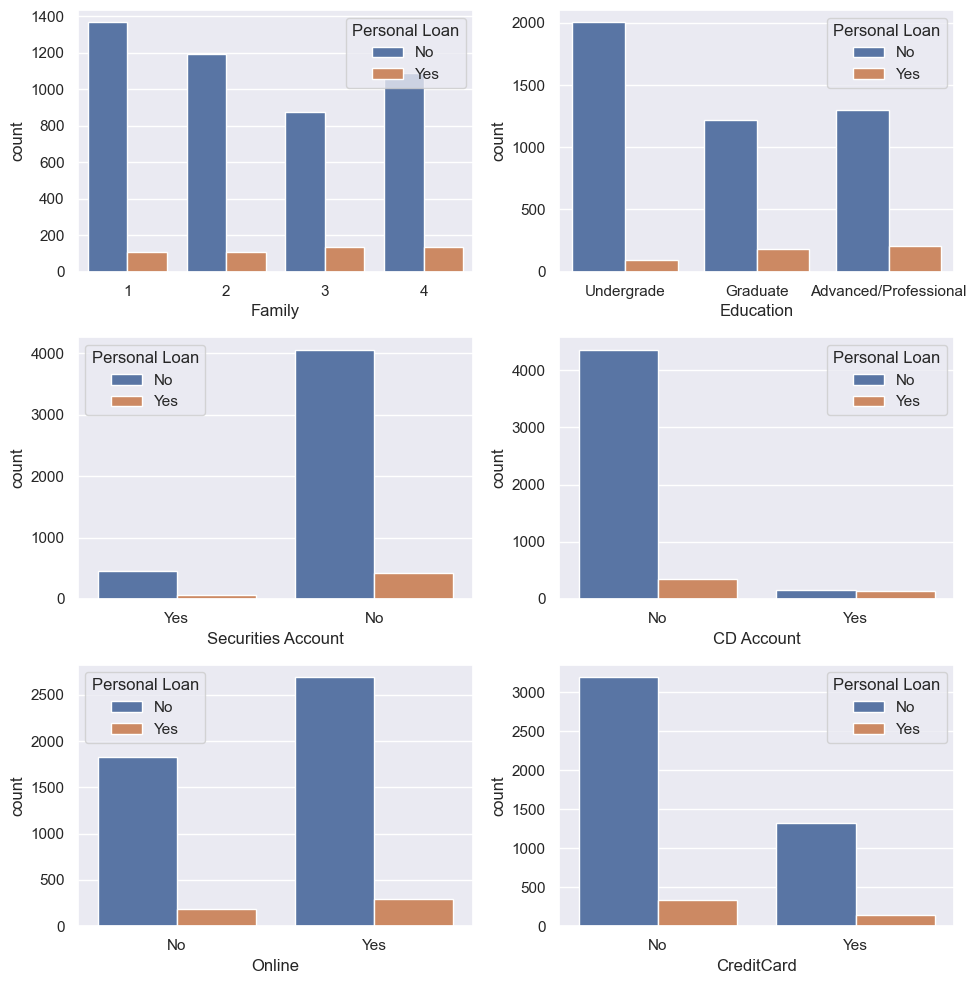

In [15]:
plt.figure(figsize=(10,10))
for idx,feature in enumerate(category_features):
    plt.subplot(3,2,idx+1)
    sns.countplot(data=loan,x=feature,hue="Personal Loan")
plt.tight_layout()
plt.show()

## visualizing numerical features

In [16]:
numeric_features=loan.select_dtypes(["int64","float64"]).columns
numeric_features

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

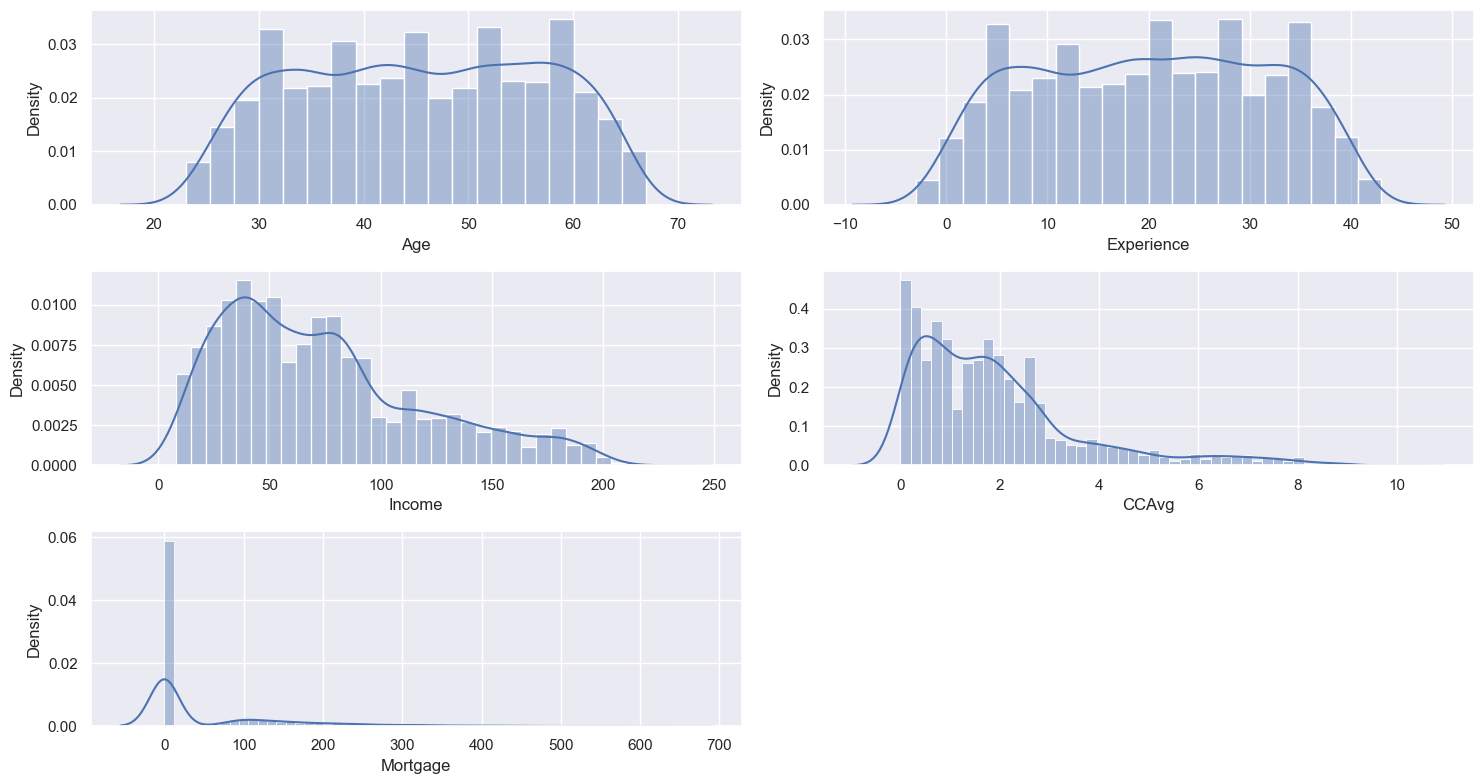

In [17]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features):
    plt.subplot(3,2,idx+1)
    sns.histplot(loan[feature],kde=True,kde_kws=dict(cut=3),stat="density",alpha=0.4)
plt.tight_layout()
plt.show()

- here Income and CCAvg is slightly sekwed
- Mortage is highly sekwed and most customers have no Mortage

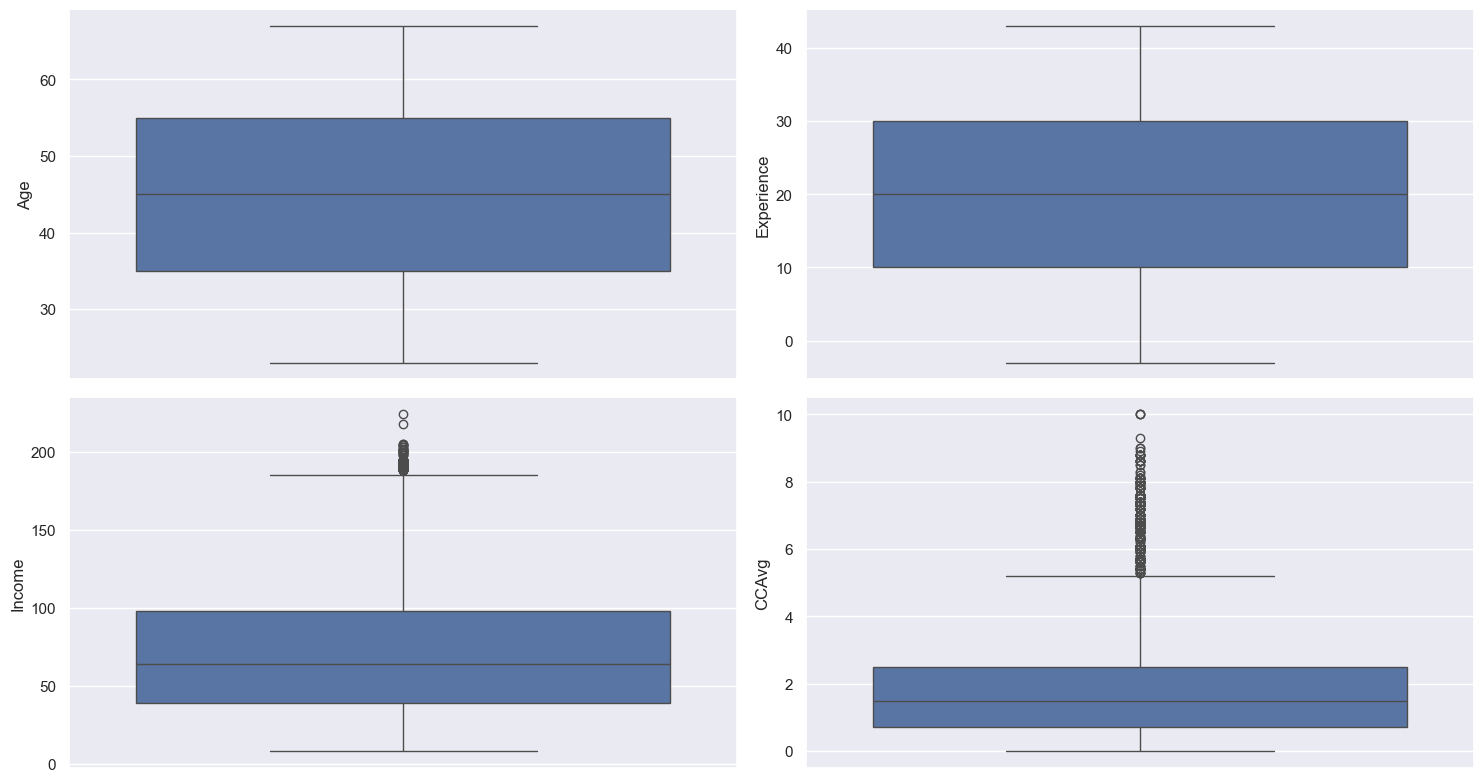

In [18]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features[:-1]):
    plt.subplot(2,2,idx+1)
    sns.boxplot(data=loan,y=feature)
plt.tight_layout()
plt.show()

- here we have low outliers in income
- and alot of outliers in CCAvg

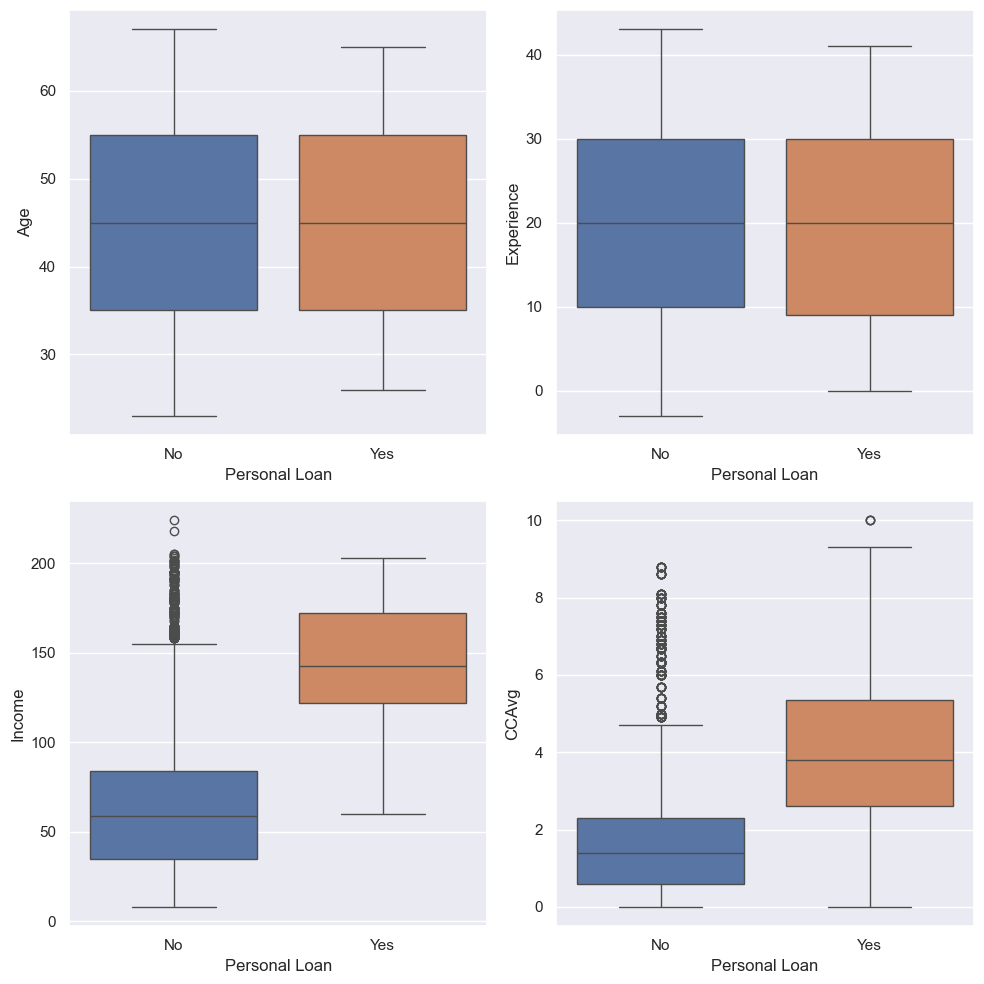

In [19]:
plt.figure(figsize=(10,10))
for idx,feature in enumerate(numeric_features[:-1]):
    plt.subplot(2,2,idx+1)
    sns.boxplot(data=loan,y=feature,x="Personal Loan",hue="Personal Loan")
plt.tight_layout()
plt.show()

# Data Preprocessing

## Missing Values

In [20]:
loan.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- so here there is no missing values

## Outliers

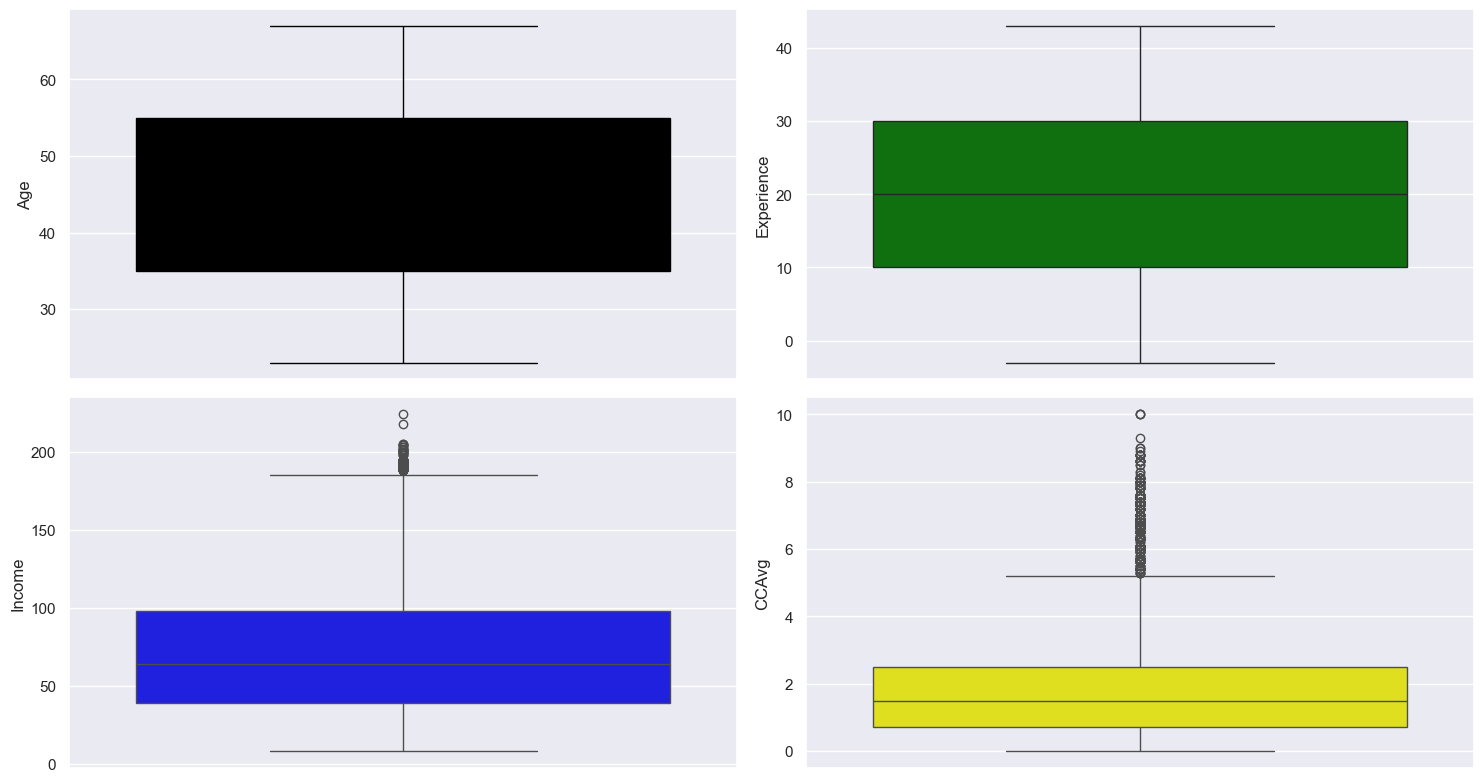

In [21]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features[:-1]):
    plt.subplot(2,2,idx+1)
    sns.boxplot(data=loan,y=feature,color=next(colors))
plt.tight_layout()
plt.show()

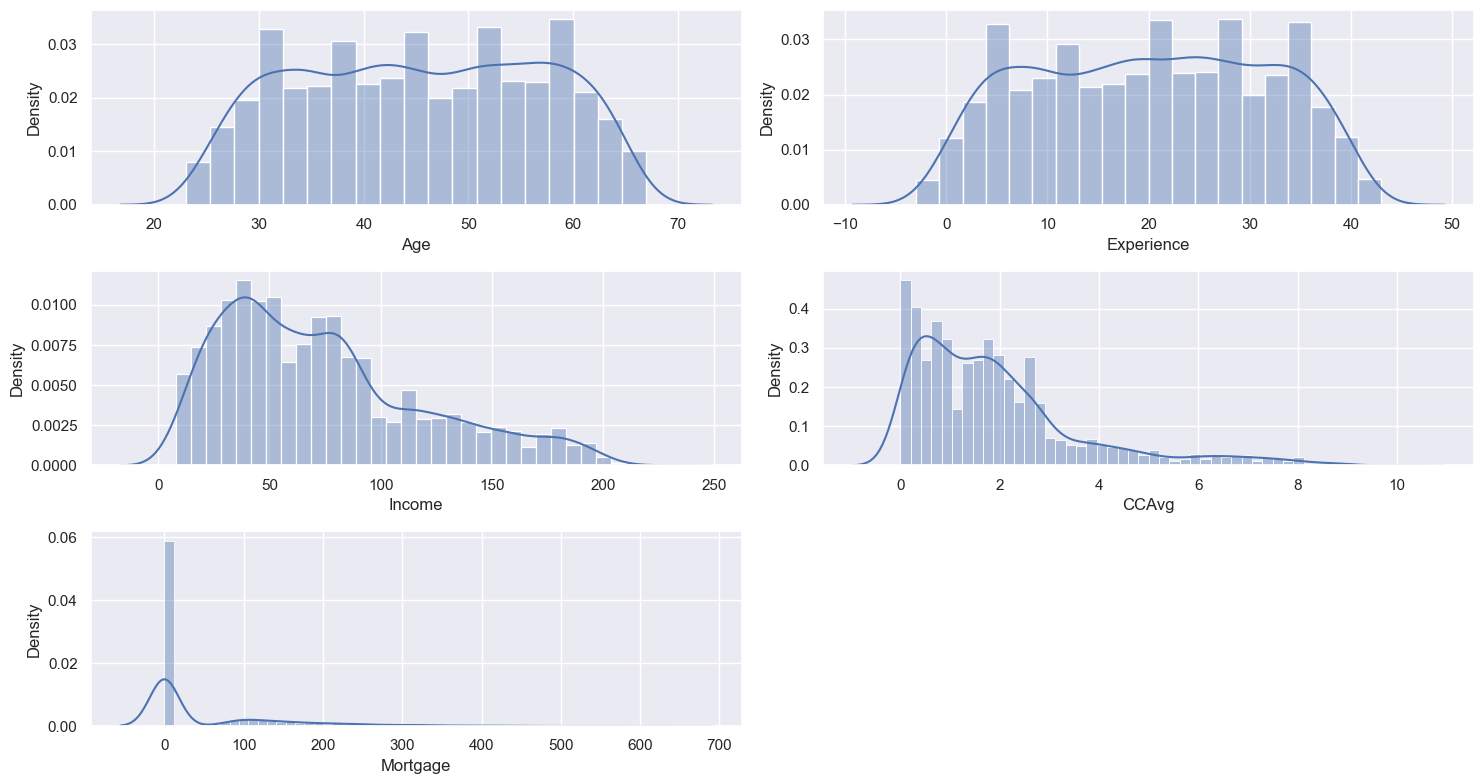

In [22]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features):
    plt.subplot(3,2,idx+1)
    sns.histplot(loan[feature],kde=True,kde_kws=dict(cut=3),stat="density",alpha=0.4)
plt.tight_layout()
plt.show()

- so here we need to remove the outliers from CCAvg

In [23]:
Q1=loan["CCAvg"].quantile(0.25)
Q3=loan["CCAvg"].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_mask=(loan["CCAvg"]<lower_bound) | (loan["CCAvg"]>upper_bound)

loan.drop(loan["CCAvg"][outlier_mask].index,inplace=True)

In [24]:
loan.shape

(4676, 12)

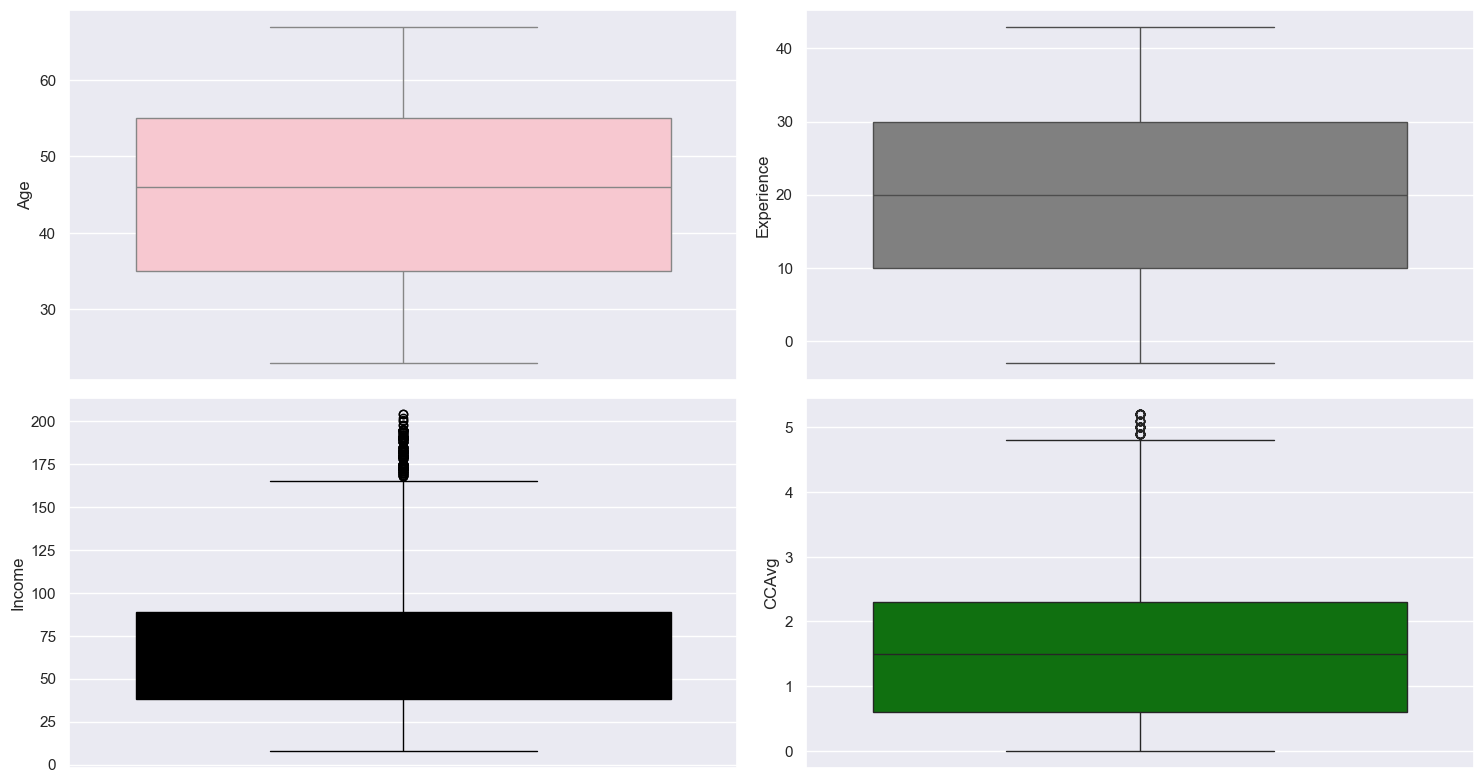

In [25]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features[:-1]):
    plt.subplot(2,2,idx+1)
    sns.boxplot(data=loan,y=feature,color=next(colors))
plt.tight_layout()
plt.show()

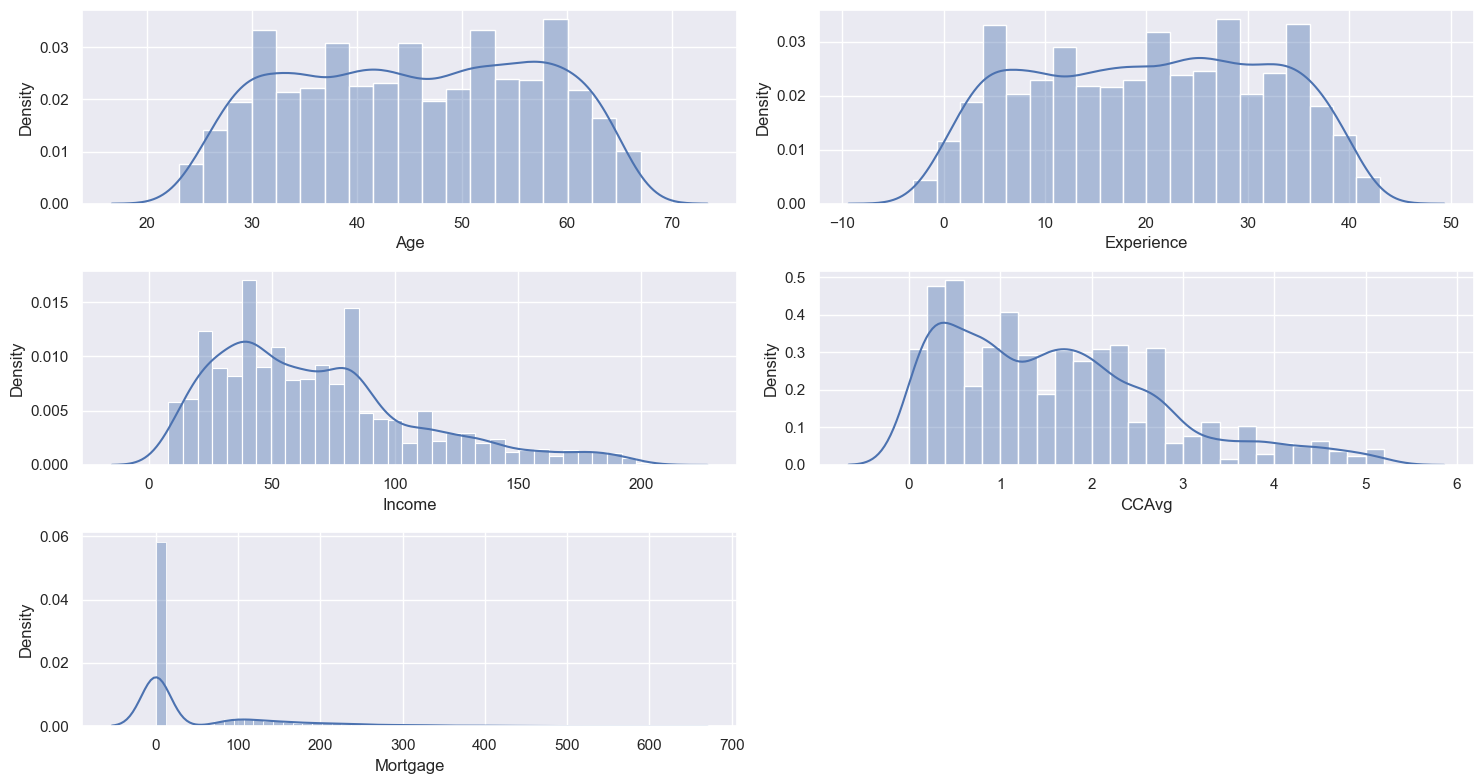

In [26]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features):
    plt.subplot(3,2,idx+1)
    sns.histplot(loan[feature],kde=True,kde_kws=dict(cut=3),stat="density",alpha=0.4)
plt.tight_layout()
plt.show()

- Here we have removed outliers

# Feature Engineering

In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4676 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4676 non-null   int64  
 1   Experience          4676 non-null   int64  
 2   Income              4676 non-null   int64  
 3   Family              4676 non-null   object 
 4   CCAvg               4676 non-null   float64
 5   Education           4676 non-null   object 
 6   Mortgage            4676 non-null   int64  
 7   Personal Loan       4676 non-null   object 
 8   Securities Account  4676 non-null   object 
 9   CD Account          4676 non-null   object 
 10  Online              4676 non-null   object 
 11  CreditCard          4676 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 474.9+ KB


In [28]:
Binary_encoder=LabelEncoder()

In [29]:
Binary_Category=["Personal Loan","Securities Account","CD Account","Online","CreditCard"]
for feature in Binary_Category:
    loan[feature]=Binary_encoder.fit_transform(loan[feature])

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4676 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4676 non-null   int64  
 1   Experience          4676 non-null   int64  
 2   Income              4676 non-null   int64  
 3   Family              4676 non-null   object 
 4   CCAvg               4676 non-null   float64
 5   Education           4676 non-null   object 
 6   Mortgage            4676 non-null   int64  
 7   Personal Loan       4676 non-null   int32  
 8   Securities Account  4676 non-null   int32  
 9   CD Account          4676 non-null   int32  
 10  Online              4676 non-null   int32  
 11  CreditCard          4676 non-null   int32  
dtypes: float64(1), int32(5), int64(4), object(2)
memory usage: 383.6+ KB


In [31]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrade,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrade,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrade,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [32]:
for feature in Binary_Category:
    loan[feature]=loan[feature].astype("int8")

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4676 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4676 non-null   int64  
 1   Experience          4676 non-null   int64  
 2   Income              4676 non-null   int64  
 3   Family              4676 non-null   object 
 4   CCAvg               4676 non-null   float64
 5   Education           4676 non-null   object 
 6   Mortgage            4676 non-null   int64  
 7   Personal Loan       4676 non-null   int8   
 8   Securities Account  4676 non-null   int8   
 9   CD Account          4676 non-null   int8   
 10  Online              4676 non-null   int8   
 11  CreditCard          4676 non-null   int8   
dtypes: float64(1), int64(4), int8(5), object(2)
memory usage: 315.1+ KB


In [34]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrade,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrade,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrade,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [35]:
family_dummy=pd.get_dummies(data=loan["Family"],dtype="int8",prefix="Family")

In [36]:
education_dummy=pd.get_dummies(data=loan["Education"],dtype="int8",prefix="Education")

In [37]:
loan_x=pd.concat([loan,family_dummy,education_dummy],axis=1)

In [38]:
loan_x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_Advanced/Professional,Education_Graduate,Education_Undergrade
0,25,1,49,4,1.6,Undergrade,0,0,1,0,0,0,0,0,0,1,0,0,1
1,45,19,34,3,1.5,Undergrade,0,0,1,0,0,0,0,0,1,0,0,0,1
2,39,15,11,1,1.0,Undergrade,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1,0,0,0,1,0,1,0


In [39]:
loan=loan_x

In [40]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_Advanced/Professional,Education_Graduate,Education_Undergrade
0,25,1,49,4,1.6,Undergrade,0,0,1,0,0,0,0,0,0,1,0,0,1
1,45,19,34,3,1.5,Undergrade,0,0,1,0,0,0,0,0,1,0,0,0,1
2,39,15,11,1,1.0,Undergrade,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1,0,0,0,1,0,1,0


In [41]:
loan.drop(["Family","Education"],axis=1,inplace=True)

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4676 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              4676 non-null   int64  
 1   Experience                       4676 non-null   int64  
 2   Income                           4676 non-null   int64  
 3   CCAvg                            4676 non-null   float64
 4   Mortgage                         4676 non-null   int64  
 5   Personal Loan                    4676 non-null   int8   
 6   Securities Account               4676 non-null   int8   
 7   CD Account                       4676 non-null   int8   
 8   Online                           4676 non-null   int8   
 9   CreditCard                       4676 non-null   int8   
 10  Family_1                         4676 non-null   int8   
 11  Family_2                         4676 non-null   int8   
 12  Family_3                 

## Corrolation

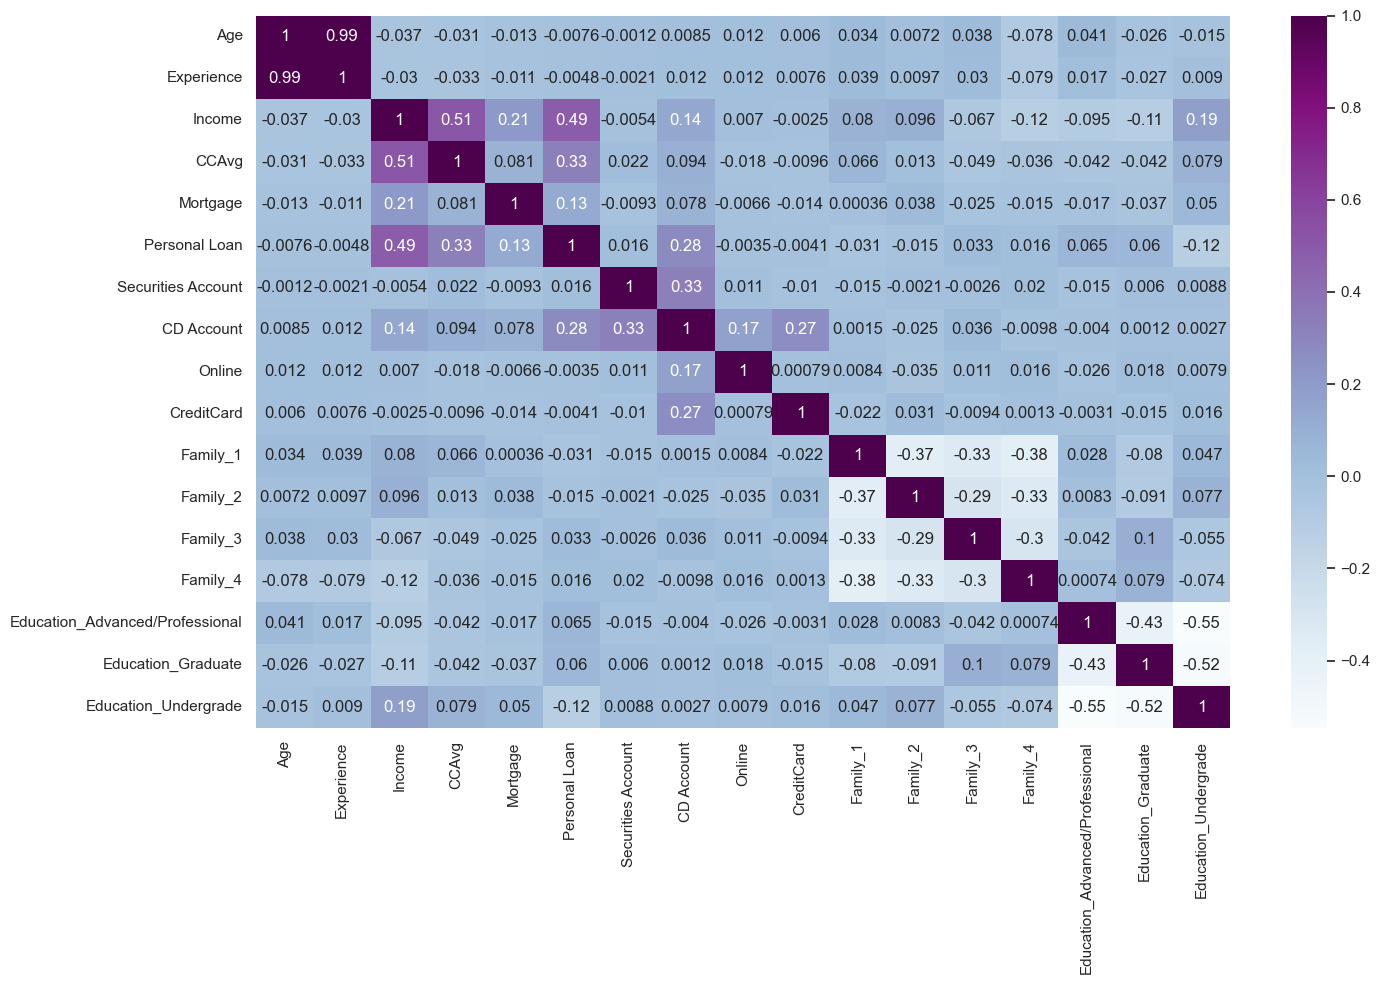

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data=loan.corr(),cmap="BuPu",annot=True)
plt.tight_layout()
plt.show()

- so here as we see there are a powerfull relationship between Age and Expeince as expected so we will drop Experince

In [44]:
loan.drop("Experience",axis=1,inplace=True)

In [45]:
loan.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_Advanced/Professional,Education_Graduate,Education_Undergrade
0,25,49,1.6,0,0,1,0,0,0,0,0,0,1,0,0,1
1,45,34,1.5,0,0,1,0,0,0,0,0,1,0,0,0,1
2,39,11,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,35,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [46]:
loan.shape

(4676, 16)

In [47]:
numeric_features=numeric_features.delete(1)

## Scaling

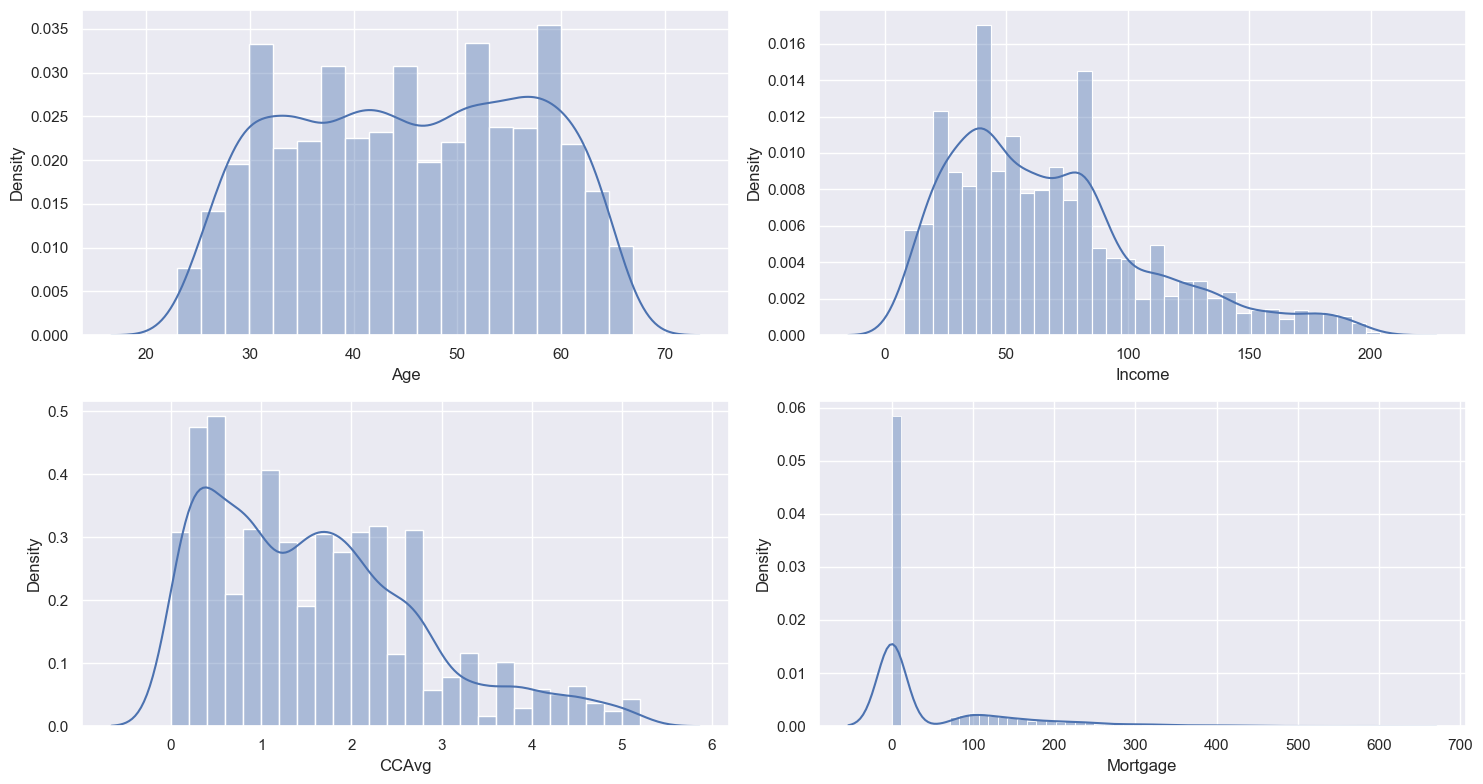

In [48]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features):
    plt.subplot(2,2,idx+1)
    sns.histplot(loan[feature],kde=True,kde_kws=dict(cut=3),stat="density",alpha=0.4)
plt.tight_layout()
plt.show()

In [49]:
standerd_scaler=StandardScaler()

In [50]:
feature_to_scale=loan.columns
feature_to_scale=feature_to_scale.delete(4)
feature_to_scale

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Education_Advanced/Professional',
       'Education_Graduate', 'Education_Undergrade'],
      dtype='object')

In [51]:
for feature in feature_to_scale:
    loan[feature]=standerd_scaler.fit_transform(loan[[feature]])

In [52]:
loan.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_Advanced/Professional,Education_Graduate,Education_Undergrade
0,-1.782405,-0.460598,0.001769,-0.562463,0,2.936222,-0.235649,-1.211423,-0.645067,-0.645067,-0.570436,-0.510605,1.714451,-0.668083,-0.639752,1.222238
1,-0.041712,-0.821498,-0.082332,-0.562463,0,2.936222,-0.235649,-1.211423,-0.645067,-0.645067,-0.570436,1.958462,-0.583277,-0.668083,-0.639752,1.222238
2,-0.563920,-1.374878,-0.502836,-0.562463,0,-0.340574,-0.235649,-1.211423,-0.645067,1.550227,-0.570436,-0.510605,-0.583277,-0.668083,-0.639752,1.222238
3,-0.912059,0.766462,0.926877,-0.562463,0,-0.340574,-0.235649,-1.211423,-0.645067,1.550227,-0.570436,-0.510605,-0.583277,-0.668083,1.563106,-0.818171
4,-0.912059,-0.556838,-0.502836,-0.562463,0,-0.340574,-0.235649,-1.211423,1.550227,-0.645067,-0.570436,-0.510605,1.714451,-0.668083,1.563106,-0.818171


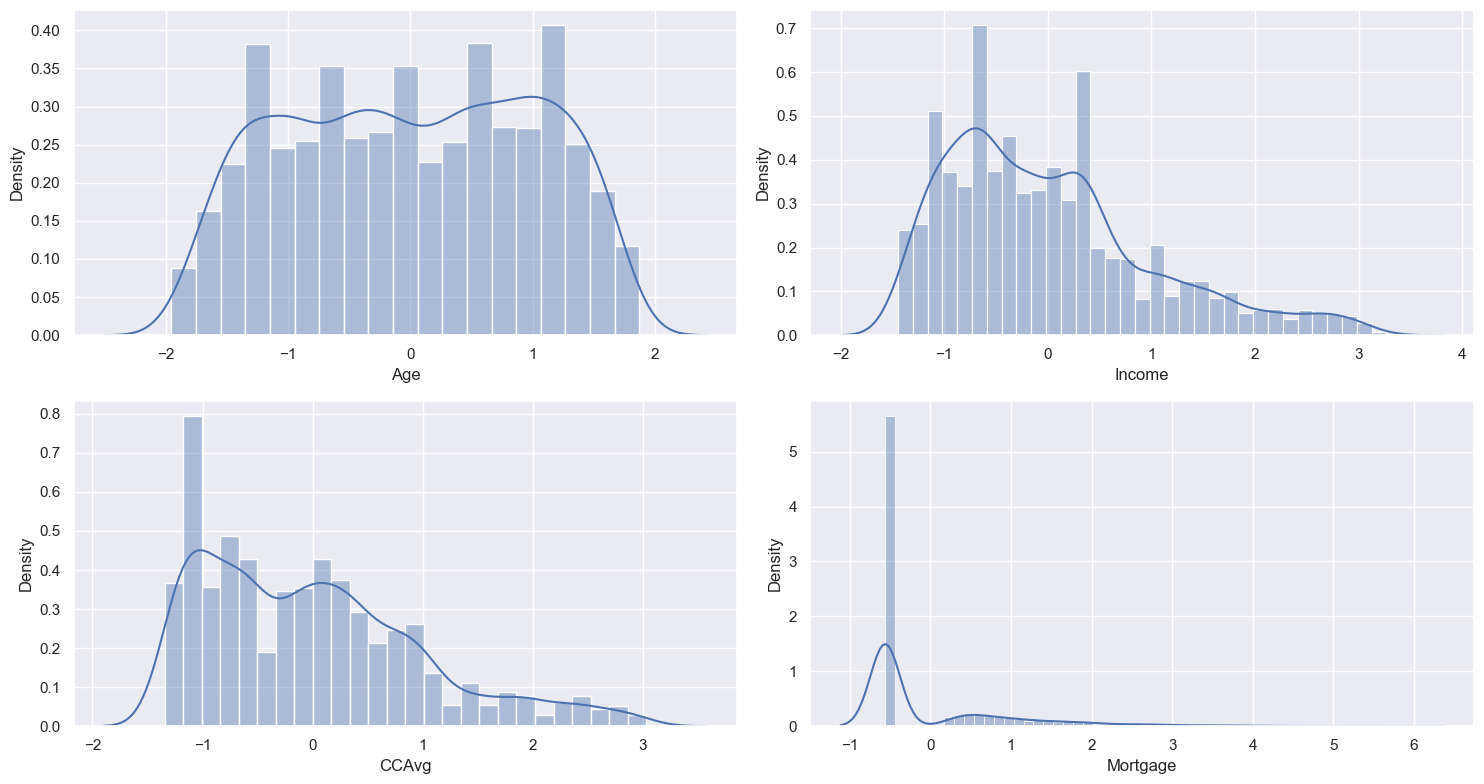

In [53]:
plt.figure(figsize=(15,8))
for idx,feature in enumerate(numeric_features):
    plt.subplot(2,2,idx+1)
    sns.histplot(loan[feature],kde=True,kde_kws=dict(cut=3),stat="density",alpha=0.4)
plt.tight_layout()
plt.show()

- here we have scaled all features

### Spiliting Data

In [54]:
X=loan.drop("Personal Loan",axis=1).values
y=loan.loc[:,"Personal Loan"].values

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3740, 15), (936, 15), (3740,), (936,))

In [57]:
X_train,y_train

(array([[ 1.52491218, -1.0620977 , -1.09154087, ...,  1.49682038,
         -0.63975206, -0.818171  ],
        [ 1.69898152, -1.15833769, -0.75513796, ..., -0.66808283,
          1.56310555, -0.818171  ],
        [-0.82502389,  3.05216219,  1.17917877, ..., -0.66808283,
         -0.63975206,  1.22223838],
        ...,
        [-0.21578121,  0.16496227, -1.1756416 , ...,  1.49682038,
         -0.63975206, -0.818171  ],
        [ 0.21939214, -1.18239769, -1.25974233, ..., -0.66808283,
         -0.63975206,  1.22223838],
        [-0.91205856, -0.00345772, -1.34384306, ..., -0.66808283,
         -0.63975206,  1.22223838]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int8))

# Build the model

In [58]:
layers=[(64,16),(16,16),(16,8),(10,10),(8,8),(10,8)]

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9026 - loss: 0.4969 - val_accuracy: 0.9765 - val_loss: 0.1230
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9679 - loss: 0.1405 - val_accuracy: 0.9765 - val_loss: 0.1038
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9719 - loss: 0.1232 - val_accuracy: 0.9797 - val_loss: 0.0968
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9716 - loss: 0.1195 - val_accuracy: 0.9765 - val_loss: 0.0997
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9710 - loss: 0.1175 - val_accuracy: 0.9786 - val_loss: 0.0890
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9749 - loss: 0.1068 - val_accuracy: 0.9733 - val_loss: 0.0899
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.1089 - val_accuracy: 0.9829 - val_loss: 0.0881
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9843 - loss: 0.0856 - val_accuracy

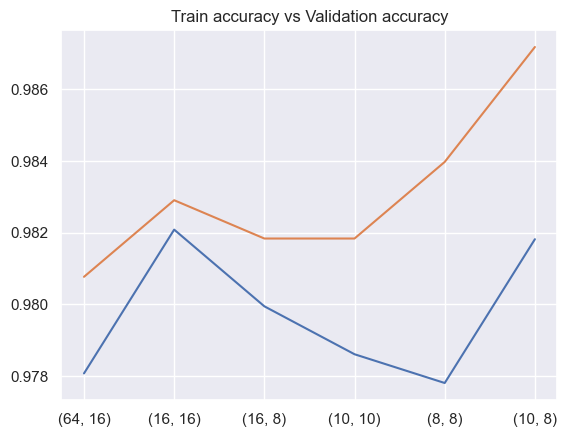

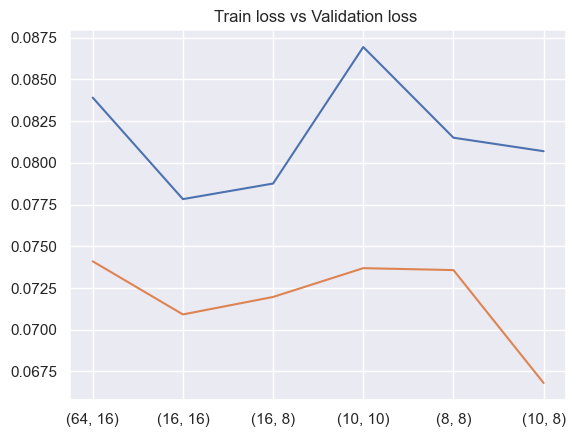

In [59]:
models=[None] * len(layers)
accuracy_train=[]
accuracy_val=[]
loss_train=[]
loss_val=[]
for i in range(len(layers)):
    models[i]=Sequential([
        tf.keras.Input(shape=(15,)),
        Dense(layers[i][0],activation="relu",kernel_regularizer=L2(0.01)),
        Dense(layers[i][1],activation="relu",kernel_regularizer=L2(0.01)),
        Dense(1,activation="sigmoid"),
    ])
    models[i].compile(
        loss=BinaryCrossentropy(),
        optimizer=Adam(learning_rate=0.01),
        metrics=["accuracy"],
    )
    models[i].fit(
        X_train,y_train,
        epochs=50,validation_data=(X_test,y_test)
    )
    loss_train1,accuracy_train1=models[i].evaluate(X_train,y_train)
    loss_val1,accuracy_val1=models[i].evaluate(X_test,y_test)
    accuracy_train.append(accuracy_train1)
    accuracy_val.append(accuracy_val1)
    loss_train.append(loss_train1)
    loss_val.append(loss_val1)
plt.xticks(ticks = range(len(layers)),labels=layers)
plt.plot(accuracy_train)
plt.plot(accuracy_val)
plt.title("Train accuracy vs Validation accuracy")
plt.show()
plt.xticks(ticks = range(len(layers)),labels=layers)
plt.plot(loss_train)
plt.plot(loss_val)
plt.title("Train loss vs Validation loss ")
plt.show()

- so here we choose the model with (16,16) neurouns

In [60]:
model=models[1]

In [61]:
loss,accuracy=model.evaluate(X_test,y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9851 - loss: 0.0710


In [62]:
prediction=model.predict(X_test)
prediction=(prediction>0.5)
print(np.concatenate((prediction.reshape(len(prediction),1), y_test.reshape(len(y_test),1)),1))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [63]:
print(confusion_matrix(y_test,prediction))

[[857   8]
 [  8  63]]


In [64]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       865
           1       0.89      0.89      0.89        71

    accuracy                           0.98       936
   macro avg       0.94      0.94      0.94       936
weighted avg       0.98      0.98      0.98       936



In [66]:
fpr, tpr, _ = roc_curve(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)

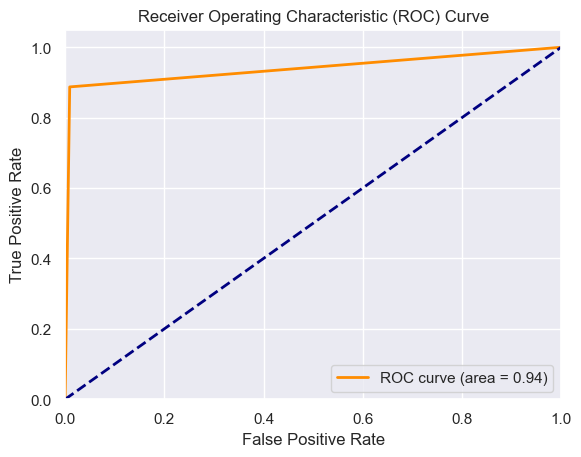

In [67]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()